In [1]:
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd

In [2]:
url = 'https://www.ebay.com/sch/i.html?_from=R40&_nkw=watches&_sacat=0&LH_PrefLoc=98&_udhi=999&LH_Auction=1&rt=nc&LH_Sold=1&LH_Complete=1'

In [3]:
def get_data(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
def parse(soup):
    results = soup.find_all('div', {'class': 's-item__info clearfix'})[1:]
    title = []
    soldprice = []
    solddate = []
    bids = []
    link = []
    for i in range(20):
        title.append(results[i+1].find('h3', {'class': 's-item__title s-item__title--has-tags'}).text),
        soldprice.append(float(results[i+1].find('span',{'class': 's-item__price'}).text.replace('$','').replace(',','').strip())),
        try:
            solddate.append(results[i+1].find('span').text),
        except Exception as e:
            solddate.append('NULL')
        bids.append(results[i+1].find('span',{'class' : 's-item__bids s-item__bidCount'}).text),
        link.append(results[i+1].find('a', {'class': 's-item__link'})['href']),
    return(pd.DataFrame({ 'title':title,
                'soldprice':soldprice,
                   'solddate': solddate,
                     'bids':bids,
                        'link': link}))
soup = get_data(url)
productslist = parse(soup)

In [5]:
productslist

,title,soldprice,solddate,bids,link
0,Duxot Consillio Matte Grey Meca Quartz Chronog...,135.00,"Sold Apr 19, 2022",1 bid,https://www.ebay.com/itm/154941178991?epid=170...
1,"NIXON ""Take Charge"" The CORPORAL 100M Stainles...",19.90,"Sold Apr 19, 2022",1 bid,https://www.ebay.com/itm/403597891745?hash=ite...
2,KENNETH COLE RK1103 STAINLESS STEEL 3 ATM BLAC...,24.99,"Sold Apr 18, 2022",1 bid,https://www.ebay.com/itm/294923756994?hash=ite...
3,New ListingFossil Dean Chronograph FS4721 Wris...,50.00,"Sold Apr 18, 2022",1 bid,https://www.ebay.com/itm/394036540647?epid=177...
4,Geoffry Beene dress watch stainless steel brac...,10.50,"Sold Apr 18, 2022",5 bids,https://www.ebay.com/itm/354004579902?hash=ite...
5,"VTG Fossil Womens 26mm Quartz Watch ES8513, Go...",8.00,"Sold Apr 18, 2022",6 bids,https://www.ebay.com/itm/185382235589?hash=ite...
6,Anne Klein Gold Tone Bangle Watch 10/7406 775H,0.99,"Sold Apr 18, 2022",2 bids,https://www.ebay.com/itm/374015330857?hash=ite...
7,Vintage Porsche Design Lemania 5100 PVD Chrono...,970.00,"Sold Apr 18, 2022",55 bids,https://www.ebay.com/itm/154943847124?epid=170...
8,MOVADO Bold Stainless Steel Gray PVD Dial Mesh...,227.50,"Sold Apr 18, 2022",69 bids,https://www.ebay.com/itm/313953263906?hash=ite...
9,Vintage 1970's Timex Gold-Tone Red LED Digital...,24.99,"Sold Apr 18, 2022",1 bid,https://www.ebay.com/itm/185384898129?hash=ite...


In [6]:
df = productslist

In [7]:
df[["new bids", "string"]] = df["bids"].str.split(" ",expand = True,)
df.drop(["bids", "string"], axis=1, inplace=True)
df.rename({"new bids":"bids"}, axis=1, inplace = True)
df["bids"]=df.bids.astype("int32")
df

,title,soldprice,solddate,link,bids
0,Duxot Consillio Matte Grey Meca Quartz Chronog...,135.00,"Sold Apr 19, 2022",https://www.ebay.com/itm/154941178991?epid=170...,1
1,"NIXON ""Take Charge"" The CORPORAL 100M Stainles...",19.90,"Sold Apr 19, 2022",https://www.ebay.com/itm/403597891745?hash=ite...,1
2,KENNETH COLE RK1103 STAINLESS STEEL 3 ATM BLAC...,24.99,"Sold Apr 18, 2022",https://www.ebay.com/itm/294923756994?hash=ite...,1
3,New ListingFossil Dean Chronograph FS4721 Wris...,50.00,"Sold Apr 18, 2022",https://www.ebay.com/itm/394036540647?epid=177...,1
4,Geoffry Beene dress watch stainless steel brac...,10.50,"Sold Apr 18, 2022",https://www.ebay.com/itm/354004579902?hash=ite...,5
5,"VTG Fossil Womens 26mm Quartz Watch ES8513, Go...",8.00,"Sold Apr 18, 2022",https://www.ebay.com/itm/185382235589?hash=ite...,6
6,Anne Klein Gold Tone Bangle Watch 10/7406 775H,0.99,"Sold Apr 18, 2022",https://www.ebay.com/itm/374015330857?hash=ite...,2
7,Vintage Porsche Design Lemania 5100 PVD Chrono...,970.00,"Sold Apr 18, 2022",https://www.ebay.com/itm/154943847124?epid=170...,55
8,MOVADO Bold Stainless Steel Gray PVD Dial Mesh...,227.50,"Sold Apr 18, 2022",https://www.ebay.com/itm/313953263906?hash=ite...,69
9,Vintage 1970's Timex Gold-Tone Red LED Digital...,24.99,"Sold Apr 18, 2022",https://www.ebay.com/itm/185384898129?hash=ite...,1


In [8]:
df["bids"].max()

69

In [9]:
df["soldprice"].max()

970.0

In [10]:
df["soldprice"].min()

0.99

In [11]:
df[df.soldprice>=100]

,title,soldprice,solddate,link,bids
0,Duxot Consillio Matte Grey Meca Quartz Chronog...,135.00,"Sold Apr 19, 2022",https://www.ebay.com/itm/154941178991?epid=170...,1
7,Vintage Porsche Design Lemania 5100 PVD Chrono...,970.00,"Sold Apr 18, 2022",https://www.ebay.com/itm/154943847124?epid=170...,55
8,MOVADO Bold Stainless Steel Gray PVD Dial Mesh...,227.50,"Sold Apr 18, 2022",https://www.ebay.com/itm/313953263906?hash=ite...,69
14,14k Bulova Accutron N1 w/ Marble Red Dial,819.00,"Sold Apr 18, 2022",https://www.ebay.com/itm/384829695403?hash=ite...,31
17,Elgin Shockmaster Automatic Vintage Men's Watc...,138.50,"Sold Apr 18, 2022",https://www.ebay.com/itm/403596926304?hash=ite...,20
18,FORMEX 4 SPEED SWISS MADE AS1500 AUTO CHRONO V...,749.99,"Sold Apr 18, 2022",https://www.ebay.com/itm/175238099102?hash=ite...,1


In [12]:
df[df.bids>=2]

,title,soldprice,solddate,link,bids
4,Geoffry Beene dress watch stainless steel brac...,10.50,"Sold Apr 18, 2022",https://www.ebay.com/itm/354004579902?hash=ite...,5
5,"VTG Fossil Womens 26mm Quartz Watch ES8513, Go...",8.00,"Sold Apr 18, 2022",https://www.ebay.com/itm/185382235589?hash=ite...,6
6,Anne Klein Gold Tone Bangle Watch 10/7406 775H,0.99,"Sold Apr 18, 2022",https://www.ebay.com/itm/374015330857?hash=ite...,2
7,Vintage Porsche Design Lemania 5100 PVD Chrono...,970.00,"Sold Apr 18, 2022",https://www.ebay.com/itm/154943847124?epid=170...,55
8,MOVADO Bold Stainless Steel Gray PVD Dial Mesh...,227.50,"Sold Apr 18, 2022",https://www.ebay.com/itm/313953263906?hash=ite...,69
10,Lasalle womens goldtone watch new bartery,0.99,"Sold Apr 18, 2022",https://www.ebay.com/itm/384829719608?hash=ite...,3
12,VINTAGE FOSSIL JR8209 ALL STAINLESS STEEL 5ATM...,49.99,"Sold Apr 18, 2022",https://www.ebay.com/itm/304442434157?hash=ite...,2
13,LOT OF VINTAGE MECHANICAL WATCHES CASES HAMILT...,77.00,"Sold Apr 18, 2022",https://www.ebay.com/itm/403596902413?hash=ite...,30
14,14k Bulova Accutron N1 w/ Marble Red Dial,819.00,"Sold Apr 18, 2022",https://www.ebay.com/itm/384829695403?hash=ite...,31
15,Vintage Lord Elgin Automatic Large Size Runs ...,69.00,"Sold Apr 18, 2022",https://www.ebay.com/itm/403596917862?hash=ite...,11


In [13]:
df[df.soldprice==df.soldprice.max()]

,title,soldprice,solddate,link,bids
7,Vintage Porsche Design Lemania 5100 PVD Chrono...,970.0,"Sold Apr 18, 2022",https://www.ebay.com/itm/154943847124?epid=170...,55


In [14]:
df[["title","soldprice"]][df.soldprice==df['soldprice'].max()]

,title,soldprice
7,Vintage Porsche Design Lemania 5100 PVD Chrono...,970.0


In [15]:
df.head()

,title,soldprice,solddate,link,bids
0,Duxot Consillio Matte Grey Meca Quartz Chronog...,135.00,"Sold Apr 19, 2022",https://www.ebay.com/itm/154941178991?epid=170...,1
1,"NIXON ""Take Charge"" The CORPORAL 100M Stainles...",19.90,"Sold Apr 19, 2022",https://www.ebay.com/itm/403597891745?hash=ite...,1
2,KENNETH COLE RK1103 STAINLESS STEEL 3 ATM BLAC...,24.99,"Sold Apr 18, 2022",https://www.ebay.com/itm/294923756994?hash=ite...,1
3,New ListingFossil Dean Chronograph FS4721 Wris...,50.00,"Sold Apr 18, 2022",https://www.ebay.com/itm/394036540647?epid=177...,1
4,Geoffry Beene dress watch stainless steel brac...,10.50,"Sold Apr 18, 2022",https://www.ebay.com/itm/354004579902?hash=ite...,5


<AxesSubplot:xlabel='title'>

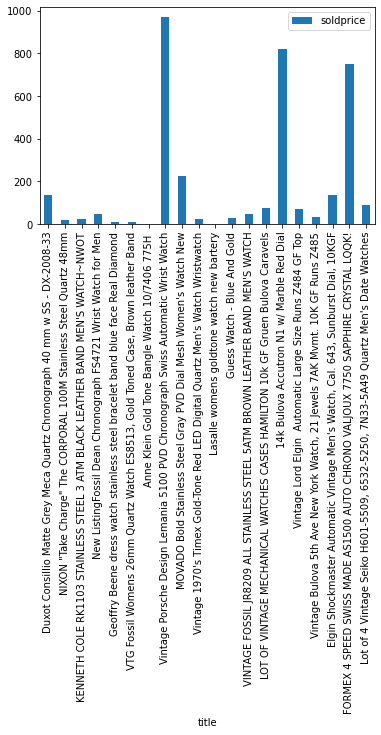

In [16]:
df.plot(x="title", y="soldprice", kind="bar")

C:\Users\khize\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='soldprice'>

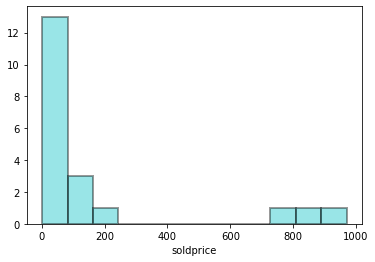

In [17]:
sns.distplot(df.soldprice,
             kde=False,
             hist_kws=dict(edgecolor="black",linewidth=2),
             color='#00BFC4')

<AxesSubplot:xlabel='bids'>

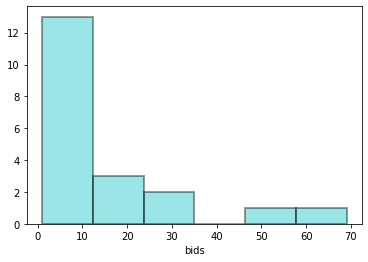

In [18]:
sns.distplot(df.bids,
             kde=False,
             hist_kws=dict(edgecolor="black",linewidth=2),
             color='#00BFC4')